In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('insurance final1.csv')

In [3]:
data.head()

,age,sex,bmi,No.of.children,smoker,high blood pressure,diabetes,cancer,charges
0,19,female,27.900,0,yes,yes,yes,yes,16884.92400
1,18,male,33.770,1,no,no,no,no,1725.55230
2,28,male,33.000,3,no,no,yes,yes,4449.46200
3,33,male,22.705,0,no,no,no,yes,21984.47061
4,32,male,28.880,0,no,no,no,yes,3866.85520


In [4]:
data.head()

,age,sex,bmi,No.of.children,smoker,high blood pressure,diabetes,cancer,charges
0,19,female,27.900,0,yes,yes,yes,yes,16884.92400
1,18,male,33.770,1,no,no,no,no,1725.55230
2,28,male,33.000,3,no,no,yes,yes,4449.46200
3,33,male,22.705,0,no,no,no,yes,21984.47061
4,32,male,28.880,0,no,no,no,yes,3866.85520


In [5]:
data.tail()

,age,sex,bmi,No.of.children,smoker,high blood pressure,diabetes,cancer,charges
1333,50,male,30.97,3,no,no,yes,no,10600.5483
1334,18,female,31.92,0,no,no,no,no,2205.9808
1335,18,female,36.85,0,no,no,no,yes,1629.8335
1336,21,female,25.80,0,no,no,no,no,2007.9450
1337,61,female,29.07,0,yes,yes,yes,yes,29141.3603


In [6]:
data.shape

(1338, 9)

In [7]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1338
Number of Columns 9


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1338 non-null   int64  
 1   sex                  1338 non-null   object 
 2   bmi                  1338 non-null   float64
 3   No.of.children       1338 non-null   int64  
 4   smoker               1338 non-null   object 
 5   high blood pressure  1338 non-null   object 
 6   diabetes             1338 non-null   object 
 7   cancer               1338 non-null   object 
 8   charges              1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [9]:
data.isnull().sum()

age                    0
sex                    0
bmi                    0
No.of.children         0
smoker                 0
high blood pressure    0
diabetes               0
cancer                 0
charges                0
dtype: int64

In [10]:
data.describe(include='all')

,age,sex,bmi,No.of.children,smoker,high blood pressure,diabetes,cancer,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,2,2,2,NaN
top,NaN,male,NaN,NaN,no,no,no,no,NaN
freq,NaN,676,NaN,NaN,1064,722,728,964,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,NaN,NaN,16639.912515


In [11]:
data['sex'].unique()
data['sex']=data['sex'].map({'female':0,'male':1})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['high blood pressure']=data['high blood pressure'].map({'yes':1,'no':0})
data['diabetes']=data['diabetes'].map({'yes':1,'no':0})
data['cancer']=data['cancer'].map({'yes':1,'no':0})

In [12]:
data.head()

,age,sex,bmi,No.of.children,smoker,high blood pressure,diabetes,cancer,charges
0,19,0,27.900,0,1,1,1,1,16884.92400
1,18,1,33.770,1,0,0,0,0,1725.55230
2,28,1,33.000,3,0,0,1,1,4449.46200
3,33,1,22.705,0,0,0,0,1,21984.47061
4,32,1,28.880,0,0,0,0,1,3866.85520


In [13]:
X = data.drop(['charges'],axis=1)
y = data['charges']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [17]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [18]:
df1

,Actual,Lr,svm,rf,gr
764,9095.06825,8566.703121,9550.796572,12650.096169,10647.548841
887,5272.17580,6989.214392,9500.631572,5344.549028,6005.926158
890,29330.98315,36844.859084,9643.651895,28064.352756,28175.712497
1293,9301.89355,9441.751871,9556.949102,10144.036639,9471.617014
259,33750.29180,26888.960118,9432.481252,34389.838113,33950.224747
...,...,...,...,...,...
109,47055.53210,39164.828398,9643.548845,47662.924574,46342.976895
575,12222.89830,12237.835091,9621.245855,12723.691088,13191.993254
535,6067.12675,7154.515244,9510.869622,5955.968018,6419.527825
543,63770.42801,40999.466108,9603.434514,46582.503819,48431.163250


In [19]:
import matplotlib.pyplot as plt

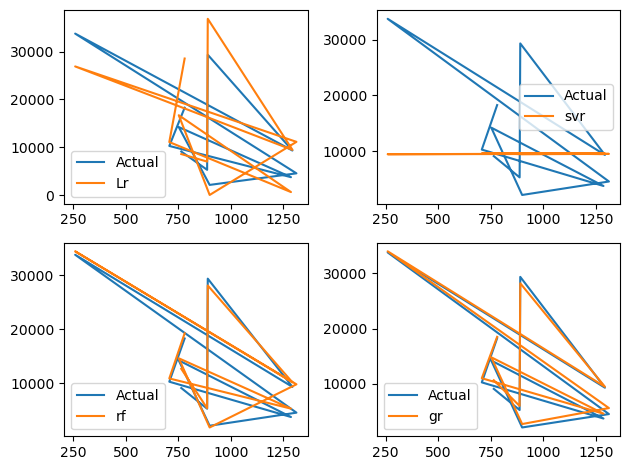

In [20]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

In [21]:
from sklearn import metrics

In [22]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [23]:
print(score1,score2,score3,score4)

0.7813529683979135 -0.07240709981512938 0.8571772066958336 0.877936606994107


In [24]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [25]:
print(s1,s2,s3,s4)

4205.0267964363875 8596.453981264038 2608.3754863171644 2435.094883637563


In [26]:
data = {'age' : 35,
        'sex' : 1,
        'bmi' : 40.30,
        'No.of.children' : 2,
        'smoker' : 1,
        'high blood pressure' : 0,
        'diabetes' : 1,
        'cancer' : 1}

In [27]:
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,No.of.children,smoker,high blood pressure,diabetes,cancer
0,35,1,40.3,2,1,0,1,1


In [28]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  43837.52742161664


In [31]:
data = {'age' : 25,
        'sex' : 0,
        'bmi' : 32.66,
        'No.of.children' : 0,
        'smoker' : 0,
        'high blood pressure' : 1,
        'diabetes' : 1,
        'cancer' : 1}

In [32]:
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,No.of.children,smoker,high blood pressure,diabetes,cancer
0,25,0,32.66,0,0,1,1,1


In [33]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  5243.34975132534


In [34]:
data = {'age' : 60,
        'sex' : 1,
        'bmi' : 55.32,
        'No.of.children' : 2,
        'smoker' : 1,
        'high blood pressure' : 1,
        'diabetes' : 1,
        'cancer' : 1}

In [35]:
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,No.of.children,smoker,high blood pressure,diabetes,cancer
0,60,1,55.32,2,1,1,1,1


In [36]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  48882.15638382923


In [37]:
data = {'age' : 88,
        'sex' : 1,
        'bmi' : 63.88,
        'No.of.children' : 2,
        'smoker' : 0,
        'high blood pressure' : 1,
        'diabetes' : 1,
        'cancer' : 0}

In [38]:
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,No.of.children,smoker,high blood pressure,diabetes,cancer
0,88,1,63.88,2,0,1,1,0


In [39]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  15613.49825892001


In [40]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [41]:
import joblib

In [42]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [43]:
model = joblib.load('model_joblib_gr')

In [44]:
model.predict(df)

array([15600.72117454])

In [45]:
from tkinter import *

In [46]:
import joblib

In [47]:
master =Tk()
master.title("Medical Charges Prediction")
label = Label(master,text = "Medical charges Prediction",bg = "black",fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Enter YourAge").grid(row=1)
Label(master,text = "Male Or Female [1/0]").grid(row=2)
Label(master,text = "Enter Your BMI Value").grid(row=3)
Label(master,text = "Enter Number Of Children").grid(row=4)
Label(master,text = "Smoker Yes/No [1/0]").grid(row=5)
Label(master,text = "High Blood Pressure Yes/No [1/0]").grid(row=6)
Label(master,text = "Diabetes Yes/No [1/0]").grid(row=7)
Label(master,text = "Cancer Yes/No [1/0]").grid(row=8)

mainloop()